In [76]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [77]:
base = pd.read_csv("credit_data.csv")
base = base.dropna()
base.loc[base.age<0,'age'] = 40.92
X = base.iloc[:,0:4].values
Y = base.iloc[:,4].values

In [78]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)

In [79]:
def calcularDimensaoMatriz(tamanho_treinamento):
    import math
    tamanho_matriz = 5*math.sqrt(tamanho_treinamento)
    dimensao_matriz = math.sqrt(tamanho_matriz)
    return round(dimensao_matriz)

In [80]:
matriz_tamanho = calcularDimensaoMatriz(X.shape[0])
som = MiniSom(x = matriz_tamanho, y = matriz_tamanho,input_len = X.shape[1],random_seed= 0)

In [81]:
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

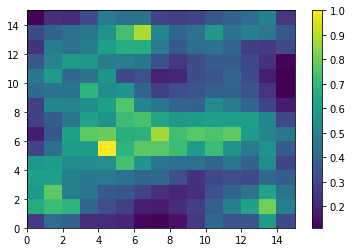

In [82]:
from pylab import pcolor, colorbar,plot
pcolor(som.distance_map().T)
colorbar()

In [83]:
neuronio_bmu = som.winner(X[2]) #coordenada do bmu
marcadores = ['o', 's']
cores = ['r','g']

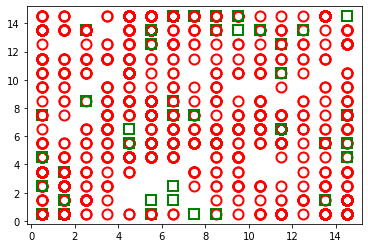

In [84]:
for i,x in enumerate(X):
    neuronio_bmu = som.winner(x)
    plot(neuronio_bmu[0] + 0.5, 
         neuronio_bmu[1]+ 0.5, 
         marcadores[Y[i]], 
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgecolor = cores[Y[i]], 
         markeredgewidth = 2)

In [85]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[(13,9)], mapeamento[(1,10)]),axis=0)
suspeitos = normalizador.inverse_transform(suspeitos)

In [86]:
classe = []
for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i,0] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])
classe = np.asarray(classe)

In [87]:
suspeitos_final = np.column_stack((suspeitos,classe))
suspeitos_final = suspeitos_final[suspeitos_final[:,4].argsort()]
suspeitos_final

array([[4.00000000e+00, 4.27095342e+04, 4.57519724e+01, 6.10364226e+03,
        0.00000000e+00],
       [4.70000000e+01, 4.18969716e+04, 4.72507310e+01, 4.89220973e+03,
        0.00000000e+00],
       [1.08500000e+03, 3.29218486e+04, 4.37330527e+01, 2.55321278e+03,
        0.00000000e+00],
       [1.13600000e+03, 3.04516362e+04, 4.21971367e+01, 4.75420592e+02,
        0.00000000e+00],
       [1.16200000e+03, 2.84517056e+04, 4.16010754e+01, 1.04285038e+03,
        0.00000000e+00],
       [1.17200000e+03, 3.00372031e+04, 3.86849202e+01, 1.24701279e+03,
        0.00000000e+00],
       [1.18800000e+03, 2.82228789e+04, 4.03313678e+01, 6.13240620e+02,
        0.00000000e+00],
       [1.22800000e+03, 3.12333078e+04, 4.17040518e+01, 1.66245362e+03,
        0.00000000e+00],
       [1.29500000e+03, 3.22822518e+04, 4.26349559e+01, 3.34594196e+03,
        0.00000000e+00],
       [1.32200000e+03, 3.69703604e+04, 3.37045991e+01, 1.26850638e+03,
        0.00000000e+00],
       [1.39500000e+03, 3.5243

In [88]:
suspeitos_final.shape

(12, 5)

In [89]:
suspeitos_final_dataframe = pd.DataFrame({'id': suspeitos_final[:, 0], 
                        'age': suspeitos_final[:, 2],
                        'income': suspeitos_final[:, 1],
                        'loan': suspeitos_final[:, 3],
                        'isAproved': suspeitos_final[:, 4]
                        })

In [90]:
suspeitos_final_dataframe

,id,age,income,loan,isAproved
0,4.0,45.751972,42709.534201,6103.642260,0.0
1,47.0,47.250731,41896.971599,4892.209734,0.0
2,1085.0,43.733053,32921.848579,2553.212778,0.0
3,1136.0,42.197137,30451.636161,475.420592,0.0
4,1162.0,41.601075,28451.705566,1042.850376,0.0
5,1172.0,38.684920,30037.203133,1247.012791,0.0
6,1188.0,40.331368,28222.878911,613.240620,0.0
7,1228.0,41.704052,31233.307759,1662.453616,0.0
8,1295.0,42.634956,32282.251753,3345.941958,0.0
9,1322.0,33.704599,36970.360442,1268.506383,0.0
